Problem Description
•This is the dilemma of a reputed US airline carrier ‘Falcon airlines’. They aim to determine the relative importance of each parameter with regards to their contribution to passenger satisfaction. Provided is a random sample of 90917 individuals who travelled using their flights. The on-time performance of the flights along with the passengers’ information is published in the csv file named ‘Flight data’.  These passengers were asked to provide their feedback at the end of their flights on various parameters along with their overall experience. These collected details are made available in the survey report csv labelled ‘Survey data’.
•In the survey, the passengers were explicitly asked whether they were satisfied with their overall flight experience and that is captured in the data of survey report under the variable labelled ‘Satisfaction’.

Dataset
•The problem consists of 2 separate datasets: Flight data & Survey data. The flight data has information related to passengers and the performance of flights in which they travelled. The survey data is the aggregated data of surveys collected post service experience. You are expected to treat both the datasets as raw data and perform any necessary cleaning/validation steps as required.

Objective
•The two objective of this project are-
1.To understand which parameters play an important role in swaying a passenger feedback towards ‘satisfied’.
2.To predict whether a passenger will be satisfied or not given the rest of the details are provided.


In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import operator
from sklearn.model_selection import cross_val_score
plt.style.use('seaborn')
%matplotlib inline

In [2]:
import plotly
import plotly.express as px
import plotly.graph_objects as go

In [3]:
df_flight = pd.read_csv("Marketing Project-Flight data.csv")  
#import pandas as pd

In [4]:
df_flight.head

<bound method NDFrame.head of        CustomerID  Gender       CustomerType  Age       TypeTravel Class  \
0          149965  Female     Loyal Customer   65  Personal Travel   Eco   
1          149966  Female     Loyal Customer   15  Personal Travel   Eco   
2          149967  Female     Loyal Customer   60  Personal Travel   Eco   
3          149968  Female     Loyal Customer   70  Personal Travel   Eco   
4          149969    Male     Loyal Customer   30              NaN   Eco   
...           ...     ...                ...  ...              ...   ...   
90912      240877  Female  disloyal Customer   11  Personal Travel   Eco   
90913      240878  Female  disloyal Customer   29  Personal Travel   Eco   
90914      240879    Male  disloyal Customer   69  Personal Travel   Eco   
90915      240880    Male  disloyal Customer   66  Personal Travel   Eco   
90916      240881  Female  disloyal Customer   38  Personal Travel   Eco   

       Flight_Distance  DepartureDelayin_Mins  ArrivalDel

In [47]:
df_survey = pd.read_csv("Marketing Project-Survey data.csv")

In [48]:
df_survey.head()

,CustomerId,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,149965,satisfied,extremely poor,extremely poor,extremely poor,need improvement,need improvement,good,need improvement,acceptable,acceptable,extremely poor,acceptable,excellent,acceptable,need improvement
1,149966,satisfied,extremely poor,extremely poor,extremely poor,manageable,need improvement,extremely poor,need improvement,need improvement,NaN,acceptable,good,good,good,need improvement
2,149967,satisfied,extremely poor,NaN,extremely poor,manageable,acceptable,good,acceptable,poor,poor,extremely poor,poor,good,poor,acceptable
3,149968,satisfied,extremely poor,extremely poor,extremely poor,manageable,good,acceptable,good,need improvement,need improvement,extremely poor,need improvement,good,need improvement,excellent
4,149969,satisfied,extremely poor,extremely poor,extremely poor,manageable,need improvement,extremely poor,need improvement,need improvement,excellent,good,excellent,excellent,good,need improvement


In [51]:
df_survey['Seat_comfort'].replace({'extremely poor':0, 'poor':1, 'need improvement':2, 'acceptable':3, 'good':4, 'excellent':5}, inplace=True)
df_survey['Departure.Arrival.time_convenient'].replace({'extremely poor':0, 'poor':1, 'need improvement':2, 'acceptable':3, 'good':4, 'excellent':5}, inplace=True)
df_survey['Food_drink'].replace({'extremely poor':0, 'poor':1, 'need improvement':2, 'acceptable':3, 'good':4, 'excellent':5}, inplace=True)
df_survey['Gate_location'].replace({'very inconvinient':0, 'inconvinient':1, 'need improvement':2, 'manageable':3, 'Convinient':4, 'very convinient':5}, inplace=True)
df_survey['Inflightwifi_service'].replace({'extremely poor':0, 'poor':1, 'need improvement':2, 'acceptable':3, 'good':4, 'excellent':5}, inplace=True)
df_survey['Inflight_entertainment'].replace({'extremely poor':0, 'poor':1, 'need improvement':2, 'acceptable':3, 'good':4, 'excellent':5}, inplace=True)
df_survey['Online_support'].replace({'extremely poor':0, 'poor':1, 'need improvement':2, 'acceptable':3, 'good':4, 'excellent':5}, inplace=True)
df_survey['Ease_of_Onlinebooking'].replace({'extremely poor':0, 'poor':1, 'need improvement':2, 'acceptable':3, 'good':4, 'excellent':5}, inplace=True)
df_survey['Onboard_service'].replace({'extremely poor':0, 'poor':1, 'need improvement':2, 'acceptable':3, 'good':4, 'excellent':5}, inplace=True)
df_survey['Leg_room_service'].replace({'extremely poor':0, 'poor':1, 'need improvement':2, 'acceptable':3, 'good':4, 'excellent':5}, inplace=True)
df_survey['Baggage_handling'].replace({'extremely poor':0, 'poor':1, 'need improvement':2, 'acceptable':3, 'good':4, 'excellent':5}, inplace=True)
df_survey['Checkin_service'].replace({'extremely poor':0, 'poor':1, 'need improvement':2, 'acceptable':3, 'good':4, 'excellent':5}, inplace=True)
df_survey['Cleanliness'].replace({'extremely poor':0, 'poor':1, 'need improvement':2, 'acceptable':3, 'good':4, 'excellent':5}, inplace=True)
df_survey['Online_boarding'].replace({'extremely poor':0, 'poor':1, 'need improvement':2, 'acceptable':3, 'good':4, 'excellent':5}, inplace=True)
#df['Baggage_handling'].replace({'extremely poor':1, 'poor':1, 'need improvement':2, 'acceptable':3, 'good':4, 'excellent':5}, inplace=True)



In [63]:
df_survey.tail()

,CustomerId,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
90912,240877,satisfied,5,5.0,5.0,2,2,5,2,2,3.0,5,3,5,4,2
90913,240878,satisfied,5,5.0,5.0,3,2,5,2,2,3.0,3,4,4,4,2
90914,240879,neutral or dissatisfied,3,0.0,3.0,3,3,2,2,4,4.0,3,4,2,3,2
90915,240880,neutral or dissatisfied,3,2.0,3.0,2,3,2,2,3,3.0,2,3,2,1,2
90916,240881,neutral or dissatisfied,3,4.0,3.0,3,3,3,3,4,5.0,5,5,3,3,3


In [121]:
#removing missing data
df_survey = df_survey.fillna(0)

In [122]:
for i in range(90917):
    df_survey['CustomerId'][i]=i
df_survey.head()

<ipython-input-122-e76b31817929>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_survey['CustomerId'][i]=i


,CustomerId,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,0,satisfied,0,0.0,0.0,2,2,4,2,3,3.0,0,3,5,3,2
1,1,satisfied,0,0.0,0.0,3,2,0,2,2,0.0,3,4,4,4,2
2,2,satisfied,0,0.0,0.0,3,3,4,3,1,1.0,0,1,4,1,3
3,3,satisfied,0,0.0,0.0,3,4,3,4,2,2.0,0,2,4,2,5
4,4,satisfied,0,0.0,0.0,3,2,0,2,2,5.0,4,5,5,4,2


In [123]:
df_survey

,CustomerId,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,0,satisfied,0,0.0,0.0,2,2,4,2,3,3.0,0,3,5,3,2
1,1,satisfied,0,0.0,0.0,3,2,0,2,2,0.0,3,4,4,4,2
2,2,satisfied,0,0.0,0.0,3,3,4,3,1,1.0,0,1,4,1,3
3,3,satisfied,0,0.0,0.0,3,4,3,4,2,2.0,0,2,4,2,5
4,4,satisfied,0,0.0,0.0,3,2,0,2,2,5.0,4,5,5,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90912,90912,satisfied,5,5.0,5.0,2,2,5,2,2,3.0,5,3,5,4,2
90913,90913,satisfied,5,5.0,5.0,3,2,5,2,2,3.0,3,4,4,4,2
90914,90914,neutral or dissatisfied,3,0.0,3.0,3,3,2,2,4,4.0,3,4,2,3,2
90915,90915,neutral or dissatisfied,3,2.0,3.0,2,3,2,2,3,3.0,2,3,2,1,2


Calculating a mean for ordinal variables would be inappropriate because the spacing between categories may be uneven. Since standard deviation and variance both depend on the mean, these statistics should not be used to summarize categorical data. Instead, measures of spread for ordinal categorical data include percentiles and range.

# To understand which parameters play an important role in swaying a passenger feedback towards ‘satisfied’.

[Text(1, 0, 'Seat_comfort'),
 Text(2, 0, 'Departure.Arrival.time_convenient'),
 Text(3, 0, 'Food_drink'),
 Text(4, 0, 'Inflightwifi_service'),
 Text(5, 0, 'Inflight_entertainment'),
 Text(6, 0, 'Online_support'),
 Text(7, 0, 'Ease_of_Onlinebooking'),
 Text(8, 0, 'Onboard_service'),
 Text(9, 0, 'Leg_room_service'),
 Text(10, 0, 'Baggage_handling'),
 Text(11, 0, 'Cleanliness'),
 Text(12, 0, 'Online_boarding')]

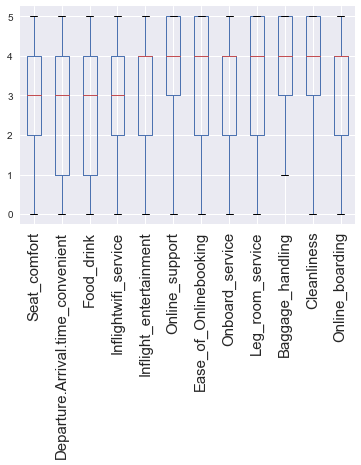

In [184]:
ax=df_survey.boxplot(column = ['Seat_comfort', 'Departure.Arrival.time_convenient', 'Food_drink', 'Inflightwifi_service', 'Inflight_entertainment','Online_support', 'Ease_of_Onlinebooking', 'Onboard_service',
       'Leg_room_service', 'Baggage_handling', 'Cleanliness', 'Online_boarding'])
#df_survey.boxplot(df_survey.boxplot.get_xlabels(,rotation=90) 
#(chart.get_xticklabels(), rotation=0)

ax.set_xticklabels(ax.get_xticklabels(),fontsize=15,rotation=90)


Middle line shows the median value, 50% of the data is below the mediun and 50% is below the median
median are better than the average and mean since they re not swayed by the outliers.
Within the box itself, we hav 25% of data above and below the median..so the box contains 50%
So those with the 505 in the hiher numbers are considerd better parameters.
Hence, parameters like cleanliness, leg_room_service,ease of onlinebooking, baggaga_handlig are important compared to the rest since the 50% of their data lies in categories of 3,4,and 5 which give a positive feedback.

This is further proved in the graphs below where those parameters have highr bars in category 3,4 and 5.

In [128]:
#categorical data
df_cat = df_survey[['Satisfaction', 'Seat_comfort', 'Departure.Arrival.time_convenient', 'Food_drink', 'Gate_location', 'Inflightwifi_service', 'Inflight_entertainment','Online_support', 'Ease_of_Onlinebooking', 'Onboard_service',
       'Leg_room_service', 'Baggage_handling', 'Cleanliness', 'Online_boarding',]]

graph for Satisfaction: total = 2


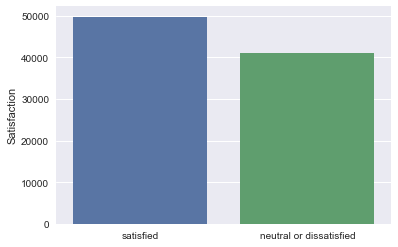

graph for Seat_comfort: total = 6


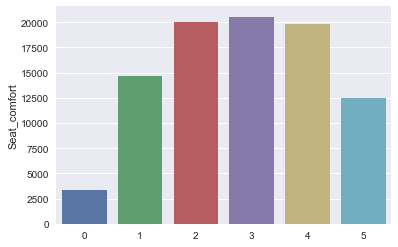

graph for Departure.Arrival.time_convenient: total = 6


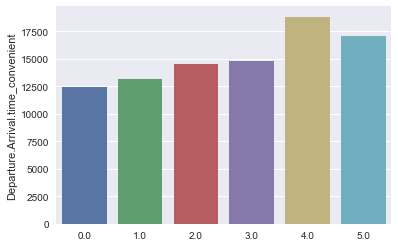

graph for Food_drink: total = 6


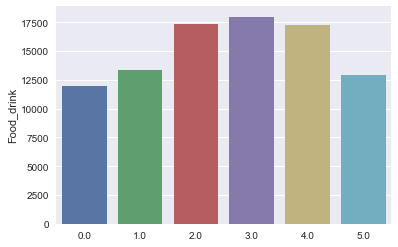

graph for Gate_location: total = 6


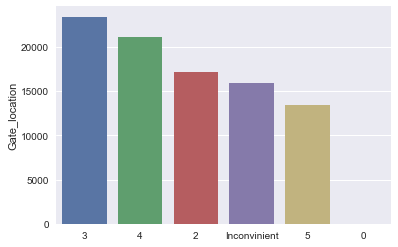

graph for Inflightwifi_service: total = 6


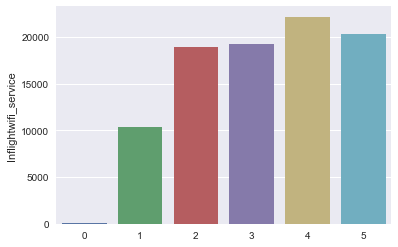

graph for Inflight_entertainment: total = 6


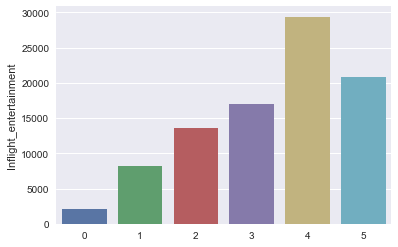

graph for Online_support: total = 6


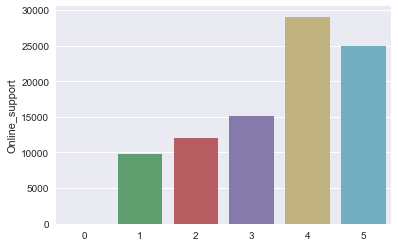

graph for Ease_of_Onlinebooking: total = 6


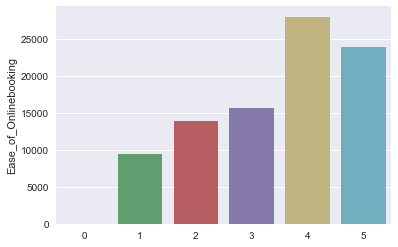

graph for Onboard_service: total = 6


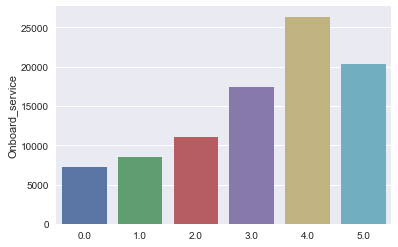

graph for Leg_room_service: total = 6


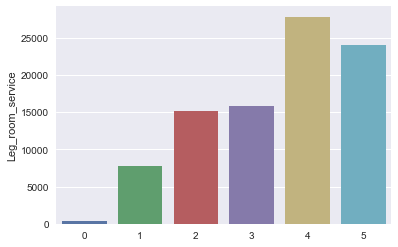

graph for Baggage_handling: total = 5


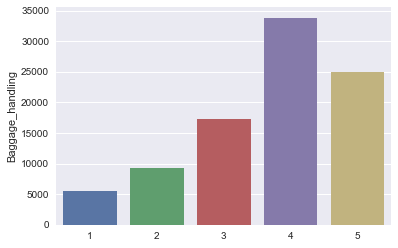

graph for Cleanliness: total = 6


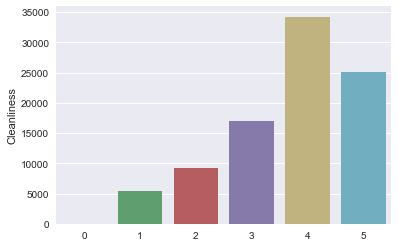

graph for Online_boarding: total = 6


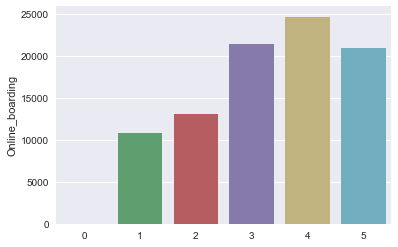

In [129]:
#making a simple bar chart for each one at once hence we shall use a for loop
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()  #number of each category
    print("graph for %s: total = %d" % (i, len(cat_num)))  #printing the number of categories at the top
    chart = sns.barplot(x=cat_num.index, y=cat_num)  #x axis with cat number index(different kinds) and y axis with the number of category
    chart.set_xticklabels(chart.get_xticklabels(), rotation=0)  #making the xlabels in 90 degress
    plt.show()

In [ ]:
#2.	To predict whether a passenger will be satisfied or not given the rest of the details are provided.

In [132]:
df_flight

,CustomerID,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
0,149965,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0.0
1,149966,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0.0
2,149967,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0.0
3,149968,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0.0
4,149969,Male,Loyal Customer,30,NaN,Eco,1894,0,0.0
...,...,...,...,...,...,...,...,...,...
90912,240877,Female,disloyal Customer,11,Personal Travel,Eco,2752,5,0.0
90913,240878,Female,disloyal Customer,29,Personal Travel,Eco,1731,0,0.0
90914,240879,Male,disloyal Customer,69,Personal Travel,Eco,2320,155,163.0
90915,240880,Male,disloyal Customer,66,Personal Travel,Eco,2450,193,205.0


In [133]:
df_flight['Gender'].replace({'Female':0 , 'Male':1}, inplace=True)
df_flight['CustomerType'].replace({'Loyal Customer':0, 'disloyal Customer':1}, inplace=True)
df_flight['TypeTravel'].replace({'Personal Travel':0, 'Business travel':1}, inplace=True)
df_flight['Class'].replace({'Eco':0, 'Business':1, 'Eco Plus':2}, inplace=True)


In [134]:
#removing missing data
df_flight = df_flight.fillna(0)

In [135]:
df_flight

,CustomerID,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
0,149965,0,0.0,65,0.0,0,265,0,0.0
1,149966,0,0.0,15,0.0,0,2138,0,0.0
2,149967,0,0.0,60,0.0,0,623,0,0.0
3,149968,0,0.0,70,0.0,0,354,0,0.0
4,149969,1,0.0,30,0.0,0,1894,0,0.0
...,...,...,...,...,...,...,...,...,...
90912,240877,0,1.0,11,0.0,0,2752,5,0.0
90913,240878,0,1.0,29,0.0,0,1731,0,0.0
90914,240879,1,1.0,69,0.0,0,2320,155,163.0
90915,240880,1,1.0,66,0.0,0,2450,193,205.0


In [142]:
df_needed = pd.concat([df_flight.CustomerID, df_survey.Satisfaction,df_flight.Gender, df_flight.CustomerType, df_flight.Age, 
                       df_flight.TypeTravel,df_flight.Class, df_flight.Flight_Distance,df_flight.DepartureDelayin_Mins, df_flight.ArrivalDelayin_Mins ], axis=1)
 
df_needed.head()

,CustomerID,Satisfaction,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
0,149965,satisfied,0,0.0,65,0.0,0,265,0,0.0
1,149966,satisfied,0,0.0,15,0.0,0,2138,0,0.0
2,149967,satisfied,0,0.0,60,0.0,0,623,0,0.0
3,149968,satisfied,0,0.0,70,0.0,0,354,0,0.0
4,149969,satisfied,1,0.0,30,0.0,0,1894,0,0.0


In [148]:
df_needed['Satisfaction'].replace({'satisfied':0, 'neutral or dissatisfied':1 }, inplace=True)
df_needed.tail()

,CustomerID,Satisfaction,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
90912,240877,0,0,1.0,11,0.0,0,2752,5,0.0
90913,240878,0,0,1.0,29,0.0,0,1731,0,0.0
90914,240879,1,1,1.0,69,0.0,0,2320,155,163.0
90915,240880,1,1,1.0,66,0.0,0,2450,193,205.0
90916,240881,1,0,1.0,38,0.0,0,4307,185,186.0


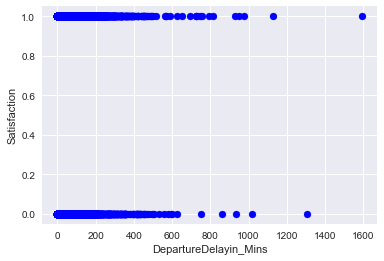

In [146]:
plt.scatter(df_needed.DepartureDelayin_Mins, df_needed.Satisfaction,  color='blue')
plt.xlabel("DepartureDelayin_Mins")
plt.ylabel("Satisfaction")
plt.show()

In [162]:
#Partitioning of data.
#training data, taking the first 900000 rows
training = df_needed.loc[0:90000]  
#training['t_square'] = training['t_linear']**2
#training['t_cubic'] = training['t_linear']**3
training
y_train = training['Satisfaction']

x_train = training.drop(['Satisfaction'], axis=1)


,CustomerID,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
0,149965,0,0.0,65,0.0,0,265,0,0.0
1,149966,0,0.0,15,0.0,0,2138,0,0.0
2,149967,0,0.0,60,0.0,0,623,0,0.0
3,149968,0,0.0,70,0.0,0,354,0,0.0
4,149969,1,0.0,30,0.0,0,1894,0,0.0
...,...,...,...,...,...,...,...,...,...
89996,239961,0,0.0,42,1.0,1,859,30,22.0
89997,239962,1,0.0,54,1.0,1,1718,12,7.0
89998,239963,1,0.0,42,1.0,1,1640,0,0.0
89999,239964,1,0.0,60,0.0,1,3536,0,0.0


In [163]:
#Partitioning of data.
#training data, taking the first 400 rows
testing = df_needed.loc[90001:90917]  #corresponding from index 0-400
#testing.head()
y_test = testing['Satisfaction']

x_test = testing.drop(['Satisfaction'], axis=1)


Output is binary in nature

In [192]:
from sklearn.linear_model import LogisticRegression
#model = LogisticRegression()
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [193]:
LR.fit(x_train, y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [194]:
#Measure accuracy of our model
LR.score(x_test, y_test)

0.8133187772925764

In [195]:
#performing a prediction using thr test data.
y_predicted = model.predict(x_test)

In [196]:
#Evaluation using the confusion matrix
#The number of correct and incorrect predictions are summarized with count values and broken down by each class
cm = confusion_matrix(y_test, y_predicted)
cm
#TP-These are cases in which we predicted yes (they are satisfied
#TN-We predicted no, and they not satified.
#FP- We predicted yes, but they are not actually satified. 
#FN- We predicted no, but they actually satified. 

array([[724,  70],
       [113,   9]], dtype=int64)

In [198]:
#model.coef_ indicates value of m in y=m*x + b equation
LR.coef_

array([[-4.48144027e-06,  1.66756279e-04,  1.43682886e-04,
         8.47870252e-04, -6.75541009e-06, -1.18750391e-04,
         2.51430053e-04,  2.26670894e-03,  2.61303649e-03]])

In [199]:
#model.intercept_ indicates value of b in y=m*x + b equation
LR.intercept_

array([6.17454182e-05])

# To predict whether a passenger will be satisfied or not given the rest of the details are provided.

In [200]:
#Lets defined sigmoid function now and do the math with hand
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [208]:
def prediction_function(CustomerID,Gender,CustomerType,Age,TypeTravel,  Class, Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins):
    z =  [(-4.481* CustomerID) + (1.667*Gender) + (CustomerType*1.437) + (Age*8.479) + (-6.755*TypeTravel) +
    ( -1.187*Class) + (Flight_Distance*2.514) + (DepartureDelayin_Mins*2.266) + (ArrivalDelayin_Mins*2.613) + 6.174 ]
    y = sigmoid(z)
    return y

In [ ]:
#the above function can be used to predict the outcome of either satisfied or not by feeding in the parameters
#predicting a passenger with the following attributes
